# Importing the Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
train_data=pd.read_csv('titanic_survival.csv',encoding='utf8')
data=train_data.copy()

# Pandas Dataframes

In [3]:
data.head() # show first five row of dataframe

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# show last five row of dataframe
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


By default, the first row of the csv file has been used as column names. We will soon see how to fix that.

In [5]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

To see the datatypes of each column we do the following:

In [6]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
print("Titanic Data Size  :" ,data.size)
print("Titanic Data Shape :" ,data.shape)

Titanic Data Size  : 5016
Titanic Data Shape : (418, 12)


We may get a quick analysis of our data using describe()
Statistical details of Dataframe

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Visualization of Data

<function matplotlib.pyplot.show(close=None, block=None)>

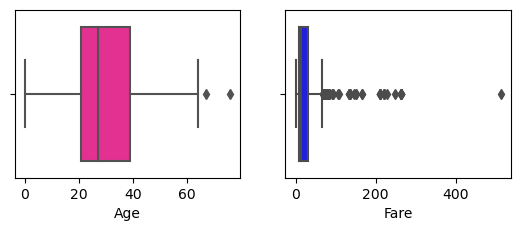

In [9]:
# outlier in age columns.
plt.subplot(2,2,1)
sns.boxplot(x=data['Age'],color="deeppink",showfliers=True)  
plt.subplot(2,2,2)
sns.boxplot(x=data['Fare'],color="Blue",showfliers=True)
plt.show

Visualization of fare Column without Outliers

<Axes: xlabel='Fare'>

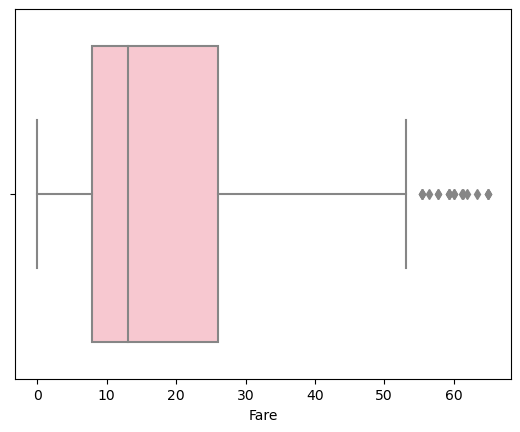

In [17]:
sns.boxplot(x=no_outlier["Fare"],showfliers=True,color="pink")  # see there is no any outlier in fare column .

Draw a graph and compare which one is more skew()

<Figure size 1200x600 with 0 Axes>

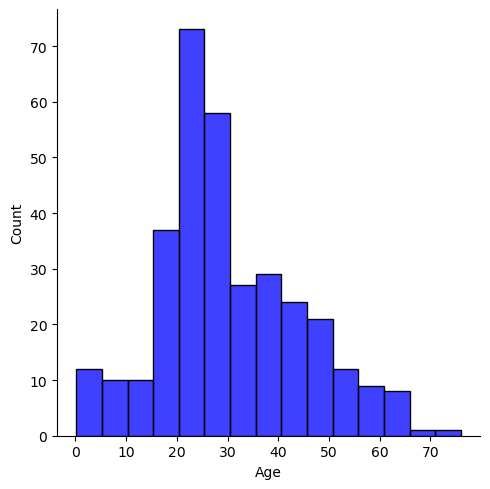

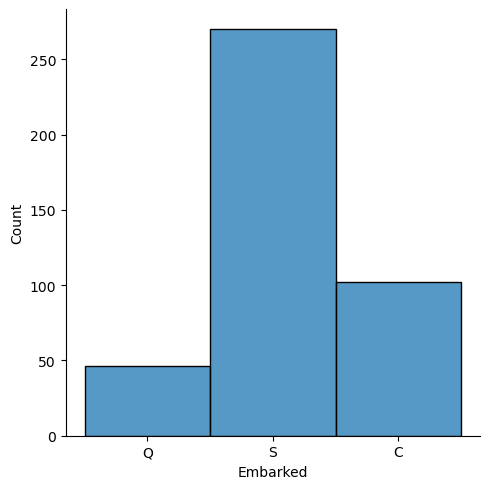

In [18]:
# comapre between the Age and Fare
plt.figure(figsize=(12,6))
#plt.subplot(2, 2, 1)
sns.displot(data['Age'],bins=15,color="blue")
#plt.subplot(2,2,2)
sns.displot(data['Embarked'])

plt.show()

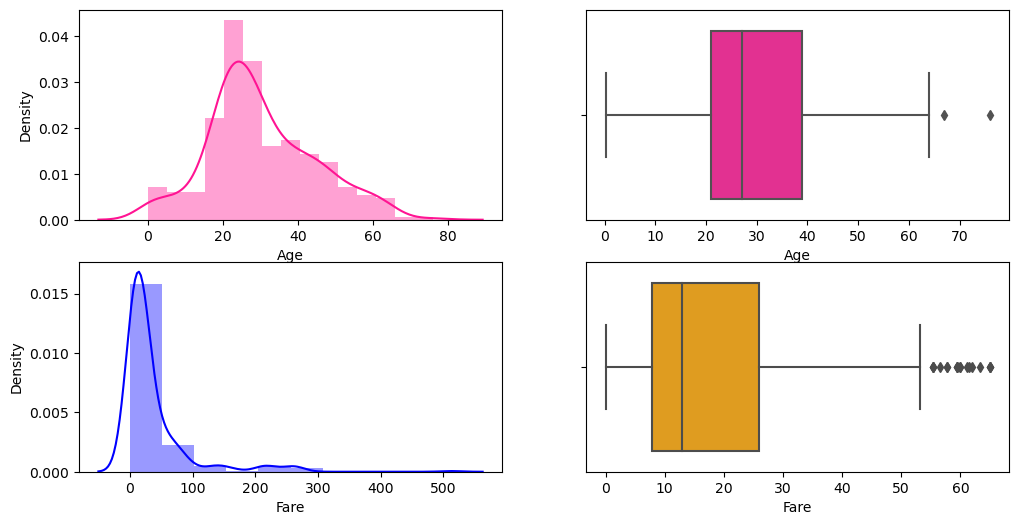

In [19]:
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.distplot(data['Age'],bins=15,color="deepPink")
plt.subplot(2,2,2)
sns.boxplot(x=data['Age'],color="deeppink")  

plt.subplot(2,2,3)
sns.distplot(data['Fare'],bins=10,color="Blue")
plt.subplot(2,2,4)
sns.boxplot(x=no_outlier['Fare'],color="orange")

plt.show()

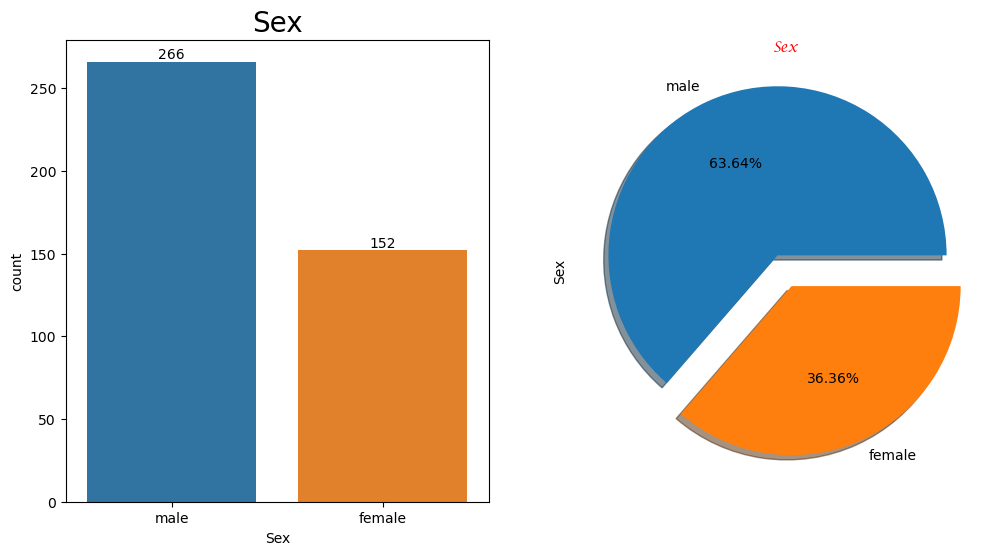

In [20]:
plt.figure(figsize=(12,6))

bound= plt.subplot(1,2,1)
# it count how many male and how many females were present in titanic. 
bound = sns.countplot(x='Sex', data=data)
bound.bar_label(bound.containers[0])   # bar graph
plt.title("Sex", fontsize=20)
bound1 =plt.subplot(1,2,2)
bound1=data['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);  # pie graph
bound1.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

<Axes: xlabel='Survived', ylabel='count'>

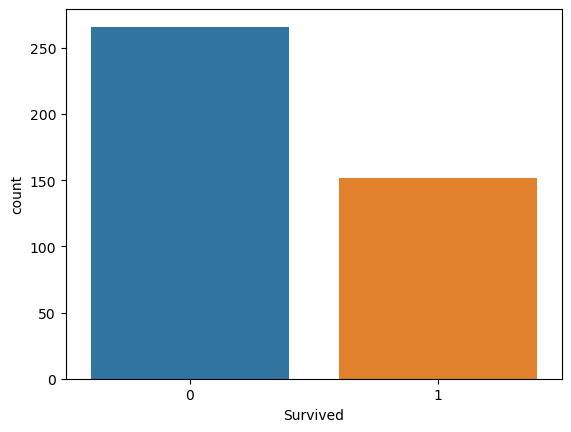

In [21]:
sns.countplot(x='Survived',data=data)

In [22]:
data['Survived'].value_counts()

0    266
1    152
Name: Survived, dtype: int64

other way to visualise data: FaceGrid
FaceGrid of Age

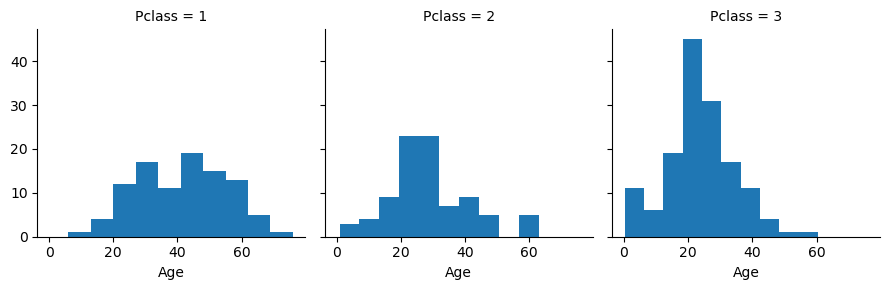

In [23]:
g = sns.FacetGrid(data, col="Pclass")  # it basically make a class 
g = g.map(plt.hist, "Age")

FaceGrid of Embarked : x-label is Age and y-label is Fare

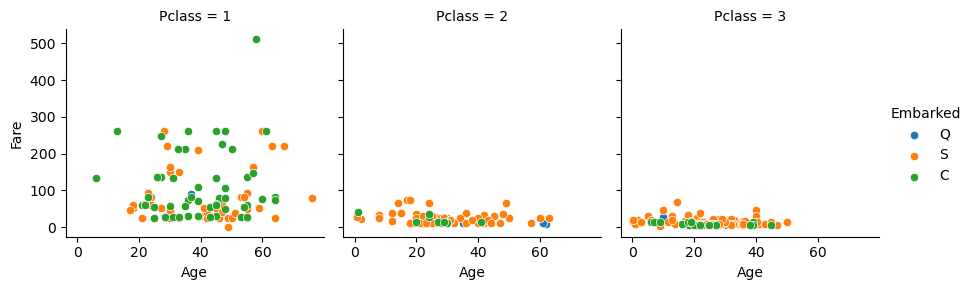

In [24]:
Embark = sns.FacetGrid(data, col="Pclass", hue="Embarked")
Embark.map_dataframe(sns.scatterplot, x="Age", y="Fare")
Embark.add_legend()

plt.show()

FaceGrid of Sex. x-label is Age and y-label=Density

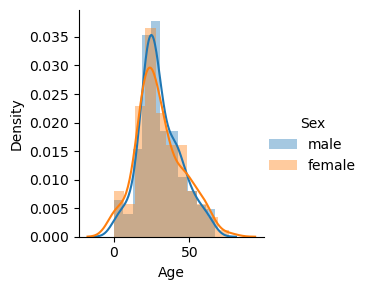

In [25]:
sns.FacetGrid(data, hue='Sex', height=3).map(sns.distplot, 'Age').add_legend()
plt.show()

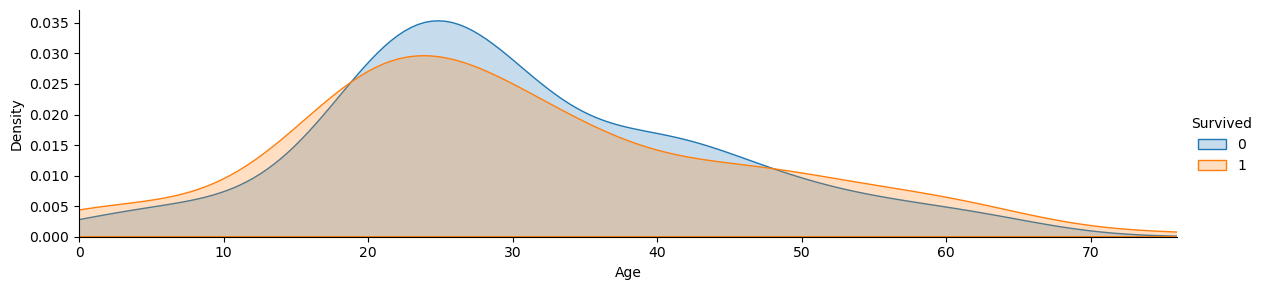

In [26]:
# Another way to visualize the data is to use FacetGrid to plot multiple kedplots on one plot

figure = sns.FacetGrid(data, hue="Survived", aspect=4)
figure.map(sns.kdeplot, 'Age', shade=True)
oldest = data['Age'].max()
figure.set(xlim=(0, oldest))
figure.add_legend()
plt.show()

Joint of two plot: joint of Age and fare with Survive Graph

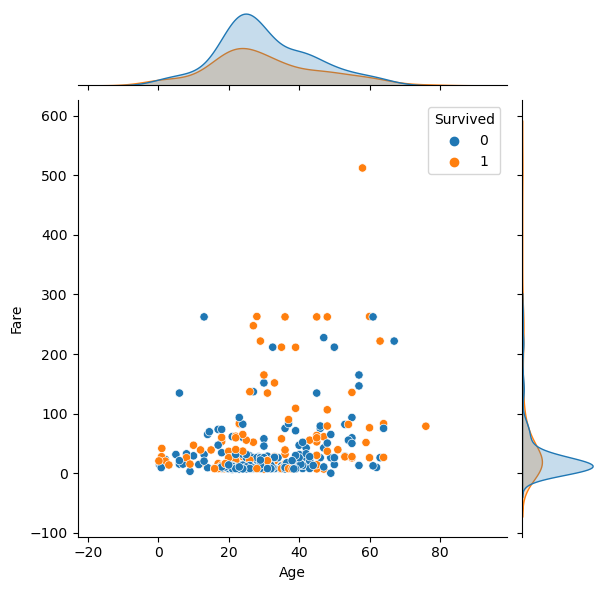

In [27]:
sns.jointplot(x="Age",y="Fare",data=data,color="olive",hue="Survived")
plt.show()

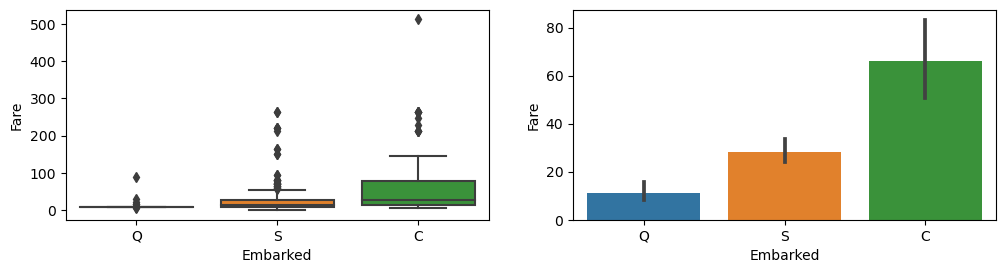

In [28]:
# visualization of outlier in Embarked column with respect to fare
plt.figure(figsize=(12,6))

plt.subplot(2,2,1)
sns.boxplot(y=data['Fare'],x=data['Embarked'],showfliers=True)
plt.subplot(2,2,2)
sns.barplot(y="Fare",x="Embarked",data=data)
plt.show()

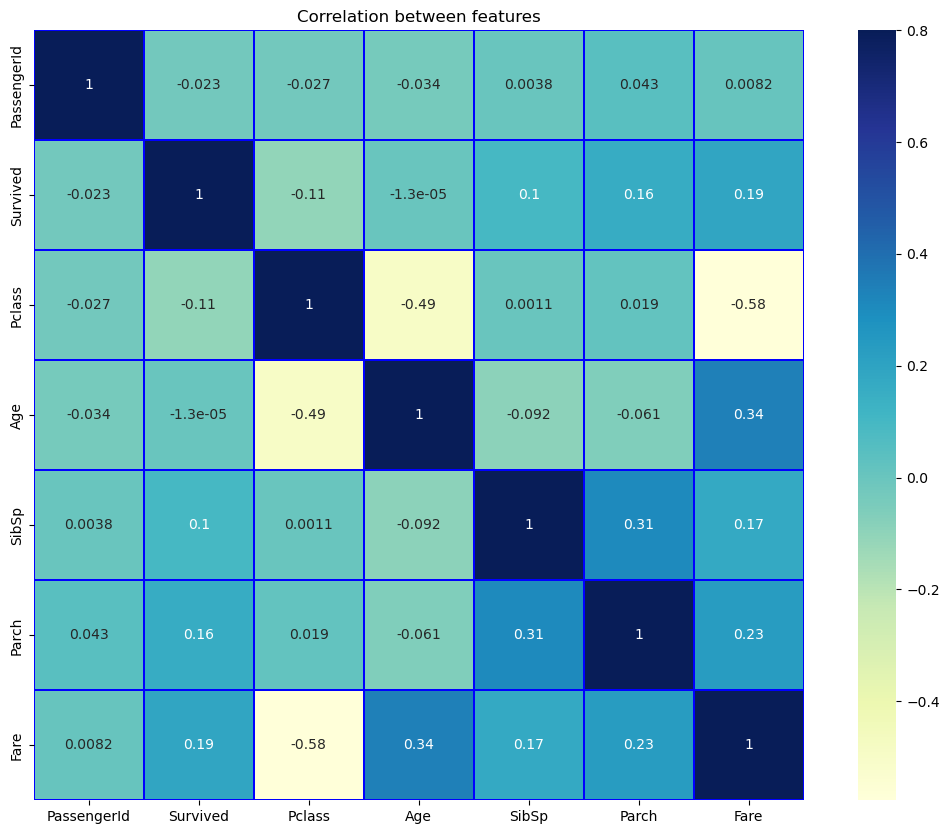

In [29]:
corr=data.corr()#["Survived"]
plt.figure(figsize=(14, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True,cmap='YlGnBu',linecolor="blue")
plt.title('Correlation between features')
plt.show()

Index(['Pclass', 'Age', 'Fare'], dtype='object')


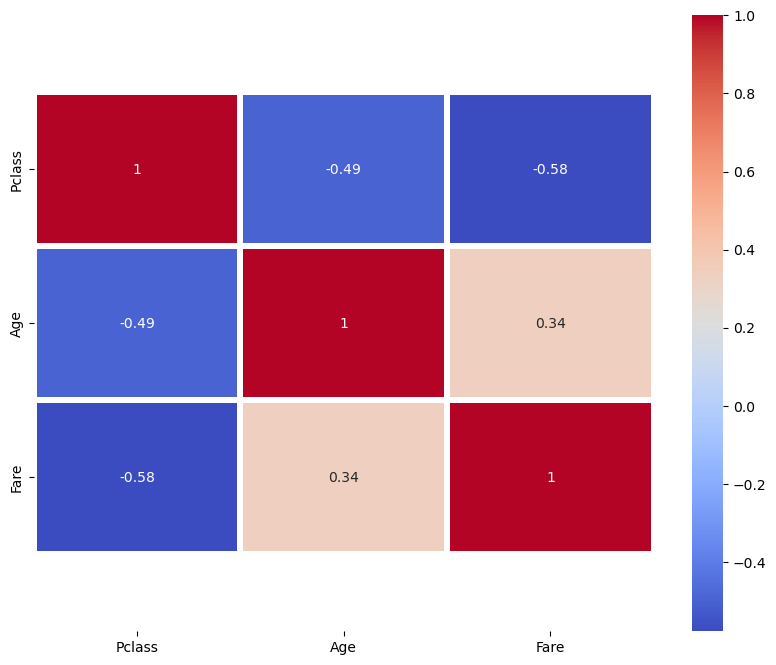

In [30]:
# correlation heatmap of higly correlated features with SalePrice

corr = data.corr()
corr_features = corr.index[abs(corr["Fare"]) >= 0.25]
print(corr_features)

plt.figure(figsize=(10,8))
x_label= sns.heatmap(data[corr_features].corr(), cmap = "coolwarm", annot=True, linewidth=3)
# to fix the bug "first and last row cut in half of heatmap plot"
bottom, top = x_label.get_ylim()
x_label.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

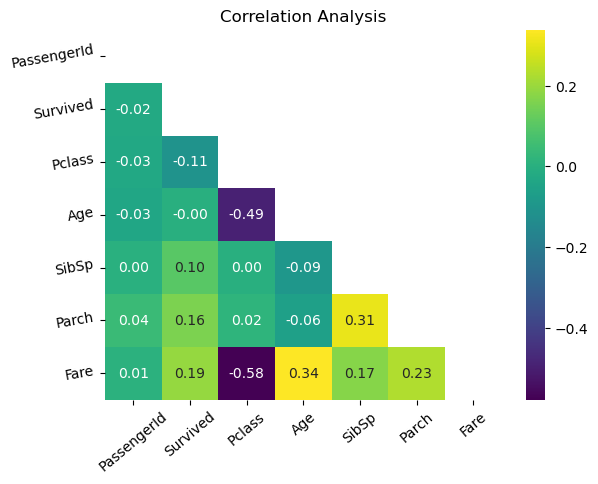

In [31]:
corr = data.corr()
mask = np.triu(np.ones_like(corr,dtype = bool))

plt.figure(dpi=100)
plt.title('Correlation Analysis')
sns.heatmap(corr,mask=mask,annot=True,lw=0,linecolor='white',cmap='viridis',fmt = "0.2f")
plt.xticks(rotation=40)
plt.yticks(rotation = 10)
plt.show()

# Data Preprocessing

# Visualizing the missing data before cleaning data (before removing null value)

<Axes: >

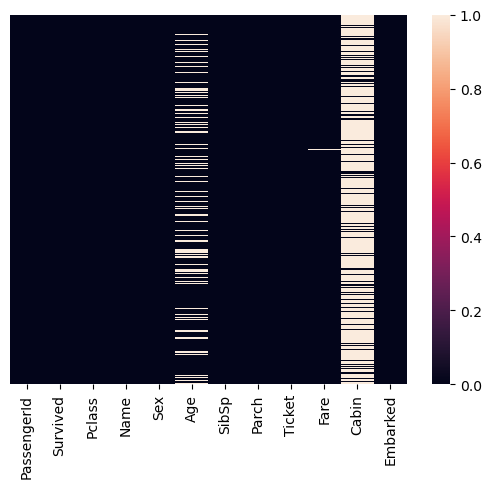

In [32]:
sns.heatmap(data.isnull(), yticklabels=False)   

Counting the No of missing values in each column

In [33]:
data.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

Calculating the percentage of missing values in Dataframe

In [34]:
per_mis_data=(data.isnull().sum())/(len(data))
print(per_mis_data)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64


In [35]:
def missing(data):
    missing_number=data.isnull().sum().sort_values(ascending=False)
    missing_percentage=(data.isnull().sum())/(len(data))
    missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing_number','missing_percentage'])
    return missing_values

In [36]:
missing(data)

,missing_number,missing_percentage
Cabin,327,0.782297
Age,86,0.205742
Fare,1,0.002392
PassengerId,0,0.000000
Survived,0,0.000000
Pclass,0,0.000000
Name,0,0.000000
Sex,0,0.000000
SibSp,0,0.000000
Parch,0,0.000000


Removing the null value from the titanic data set

In [37]:
data["Cabin"].value_counts()

B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: Cabin, Length: 76, dtype: int64

In [38]:
data.Cabin.mode()

0    B57 B59 B63 B66
Name: Cabin, dtype: object

In [39]:
# Filled the missing value in Age column with the mean value
data.Age.fillna(data.Age.mean(),inplace=True)
# Filled the missing value in Fare columns with mean Value
data.Fare.fillna(data.Fare.mean(),inplace=True)
# Filled the missing value in Cabin columns with mode Value
data.Cabin.fillna(data.Cabin.mode()[0],inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,B57 B59 B63 B66,S


Now check Data has cleaned or not 

In [40]:
def missing(data):
    missing_number=data.isnull().sum().sort_values(ascending=False)
    missing_percentage=(data.isnull().sum())/(len(data))
    missing_values=pd.concat([missing_number,missing_percentage],axis=1,keys=['missing_number','missing_percentage'])
    return missing_values

In [41]:
missing(data)  # now my data is cleaned 

,missing_number,missing_percentage
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
Age,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0
Fare,0,0.0


<Axes: >

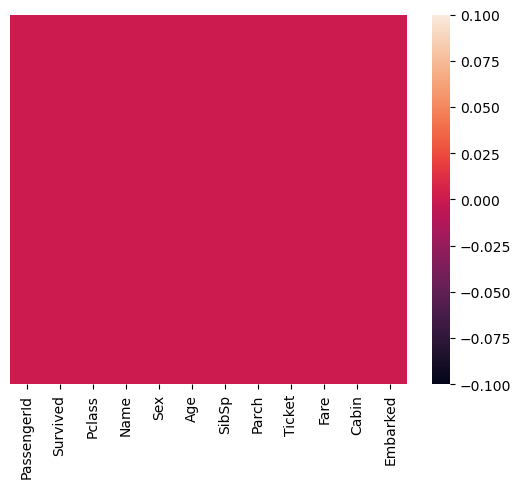

In [42]:
sns.heatmap(data.isnull(), yticklabels=False)   

In [43]:
# now check shape and size of data
print("Shape of titanic data is:",data.shape)
print("size of the titanic data is:",data.size)

Shape of titanic data is: (418, 12)
size of the titanic data is: 5016


In [44]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Remove outlier from Age, fare, Embarked column

find 25% value and 75%value and match with statical data

In [45]:
percent_25_age=data["Age"].quantile(0.25)   # verify 25% is 23.0 
percent_75_age=data["Age"].quantile(0.75)   # verify 75% is 35.75
print("25% of age:",percent_25_age,"75% of age:",percent_75_age)
percent_25_fare=data["Fare"].quantile(0.25)   # verify 25% is7.8958
percent_75_fare=data["Fare"].quantile(0.75)   # verify 75% is 31.5
print("25% of fare:",percent_25_fare,"75% of fare:",percent_75_fare)


25% of age: 23.0 75% of age: 35.75
25% of fare: 7.8958 75% of fare: 31.5


find IQR(Range)=maximum(Q3)-minimum(Q1)

In [46]:
IQR_age=percent_75_age-percent_25_age 
IQR_fare=percent_75_fare-percent_25_fare
print("IQR of age:",IQR_age)
print("IQR of Fare:",IQR_fare)

IQR of age: 12.75
IQR of Fare: 23.6042


find lowerlimit(minimum value ) upperlimit(Maximum value)

In [47]:
lower_limit_age=percent_25_age-1.5*IQR_age
upper_limit_age=percent_75_age+1.5* IQR_age
lower_limit_fare=percent_25_fare-1.5*IQR_fare
upper_limit_fare=percent_75_fare+1.5*IQR_fare
print("lower limit of age:",lower_limit_age,"upper limit of age:",upper_limit_age)
print("lower limit of fare:",lower_limit_fare,"upper limit of fare:",upper_limit_fare)

lower limit of age: 3.875 upper limit of age: 54.875
lower limit of fare: -27.5105 upper limit of fare: 66.9063


outlier data

In [48]:
# outlier data of age
outlier_data_age=data[(data.Age<lower_limit_age)|(data.Age>upper_limit_age)]
outlier_data_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
13,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,B57 B59 B63 B66,S
20,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,B57 B59 B63 B66,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
69,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S


In [49]:
#outlier data of fare
outlier_data_fare=data[(data.Fare<lower_limit_fare)|(data.Fare>upper_limit_fare)]
outlier_data_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
48,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
53,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
59,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C


In [50]:
# Reset the index 
outlier_data_age.reset_index(drop = True, inplace = True)  ## Reset the indices
outlier_data_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
1,905,0,2,"Howard, Mr. Benjamin",male,63.0,1,0,24065,26.0000,B57 B59 B63 B66,S
2,912,0,1,"Rothschild, Mr. Martin",male,55.0,1,0,PC 17603,59.4000,B57 B59 B63 B66,C
3,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
4,961,1,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.0,1,4,19950,263.0000,C23 C25 C27,S


In [51]:
outlier_data_fare.reset_index(drop = True, inplace = True)  ## Reset the indices
outlier_data_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,904,1,1,"Snyder, Mrs. John Pillsbury (Nelle Stevenson)",female,23.0,1,0,21228,82.2667,B45,S
1,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.0,1,3,PC 17608,262.3750,B57 B59 B63 B66,C
2,940,1,1,"Bucknell, Mrs. William Robert (Emma Eliza Ward)",female,60.0,0,0,11813,76.2917,D15,C
3,945,1,1,"Fortune, Miss. Ethel Flora",female,28.0,3,2,19950,263.0000,C23 C25 C27,S
4,951,1,1,"Chaudanson, Miss. Victorine",female,36.0,0,0,PC 17608,262.3750,B61,C


No outlier data. data within cluster

In [52]:
no_outlier_age=data[(data.Age>=lower_limit_age)&(data.Age<upper_limit_age)]
no_outlier_age.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,B57 B59 B63 B66,S


In [53]:
no_outlier_fare=data[(data.Fare>=lower_limit_fare)&(data.Fare<upper_limit_fare)]
no_outlier_fare.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S


In [54]:
# capping: no_outlier find
new_df_cap=data
new_df_cap['Fare']=np.where(new_df_cap['Fare']>upper_limit_fare,
                           upper_limit_fare,
                           np.where(new_df_cap['Fare']<lower_limit_fare,
                                    lower_limit_fare,
                                    new_df_cap['Fare']
                                   )
                          )

<Axes: xlabel='Fare'>

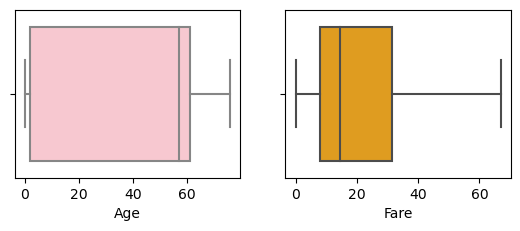

In [55]:
plt.subplot(2,2,1)
sns.boxplot(x=outlier_data_age['Age'],color="Pink")
plt.subplot(2,2,2)
sns.boxplot(x=new_df_cap['Fare'],color="orange",showfliers=True)

Categorical value is converted into numerical value by using categorical_encode

In [56]:
# Converting the categorical variable into the numerical variable by using category_encoder
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Survived','Pclass','Sex','Embarked'])
titanic_encoded = encoder.fit_transform(data)
titanic_encoded.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,1,1,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,B57 B59 B63 B66,1
1,893,2,1,"Wilkes, Mrs. James (Ellen Needs)",2,47.0,1,0,363272,7.0000,B57 B59 B63 B66,2
2,894,1,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,B57 B59 B63 B66,1
3,895,1,1,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,B57 B59 B63 B66,2
4,896,2,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",2,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,2


Splitting Independent and Dependent Variable

In [57]:
X = titanic_encoded.drop(['Survived'],axis=1)
y = data['Survived']

Splitting train and test set

In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.3,random_state= 21)
print("Shape of X_train data is:",X_train.shape,":::  Size of X_train data is:",X_train.size)
print("Shape of X_test data is:",X_test.shape," :::  Size of X_test data is:",X_test.size)
print("Shape of y_train data is:",y_train.shape,":::  Size of y_train data is:",y_train.size)
print("Shape of y_test data is:",y_test.shape," :::  Size of y_test data is:",X_test.size)

Shape of X_train data is: (292, 11) :::  Size of X_train data is: 3212
Shape of X_test data is: (126, 11)  :::  Size of X_test data is: 1386
Shape of y_train data is: (292,) :::  Size of y_train data is: 292
Shape of y_test data is: (126,)  :::  Size of y_test data is: 1386


In [59]:
data.nunique()

PassengerId    418
Survived         2
Pclass           3
Name           418
Sex              2
Age             80
SibSp            7
Parch            8
Ticket         363
Fare           142
Cabin           76
Embarked         3
dtype: int64

In [60]:
data["Pclass"] = data["Pclass"].astype('category')
data["Sex"] = data["Sex"].astype('category')
data["Embarked"] = data["Embarked"].astype('category')
data["Survived"] = data["Survived"].astype('category')
X_train["Pclass"] = X_train["Pclass"].astype('category')

In [61]:
X_train.dtypes

PassengerId       int64
Pclass         category
Name             object
Sex               int32
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked          int32
dtype: object

In [62]:
#defining numerical columns in data:
numeric_columns=data.select_dtypes(['float64','int64']).columns
numeric_columns

Index(['PassengerId', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [63]:
cat_column=X_train.select_dtypes(['object','category']).columns
cat_column

Index(['Pclass', 'Name', 'Ticket', 'Cabin'], dtype='object')

In [64]:
import pandas as pd
data['Sex'] = data['Sex'].replace({'male': 1, 'female': 2})
data['Sex'] = data['Sex'].astype(int)


In [65]:
train_data=data.copy()

In [66]:
pip install --upgrade networkx


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [73]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity

data=train_data
data = data[["Survived", "Sex"]]

# Handle missing values (if any)
data = data.dropna()

# Encode categorical features (Sex)
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data['Survived']=le.fit_transform(data['Survived'])

# Create a similarity matrix using cosine similarity
similarity_matrix = pd.DataFrame(cosine_similarity(data))

# Apply Spectral Clustering (adjust n_clusters based on your analysis)
clustering = SpectralClustering(n_clusters=2, affinity='precomputed')
labels = clustering.fit_predict(similarity_matrix)

# Print the cluster assignments
print("Cluster assignments:", labels)




Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]


         Survived       Sex
Cluster                    
0        0.370732  0.370732
1        0.000000  0.000000


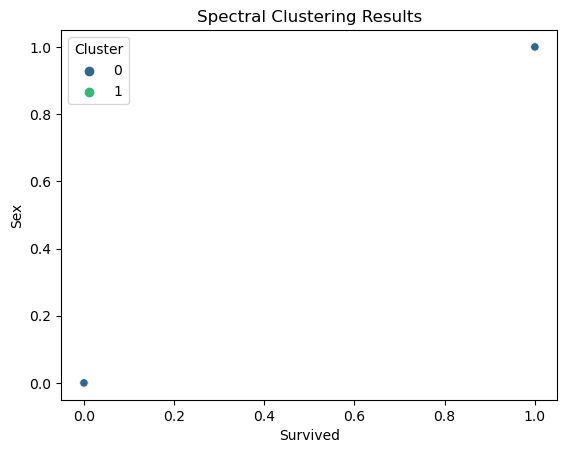

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

# Add the cluster assignments to the original DataFrame
data['Cluster'] = labels

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

# Visualize the clusters
sns.scatterplot(x='Survived', y='Sex', hue='Cluster', data=data, palette='viridis')
plt.title('Spectral Clustering Results')
plt.show()


Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Graph-based Cluster Characteristics:
         Survived       Sex
Cluster                    
0        0.366265  0.366265
1        

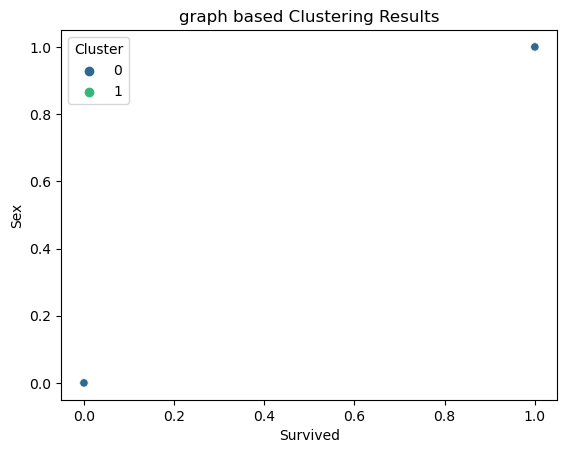

In [75]:
import pandas as pd
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data=train_data
# Select the relevant columns
data = data[["Survived", "Sex"]]

# Encode categorical features (Sex)
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Survived"]=le.fit_transform(data["Survived"])

# Create a similarity matrix using cosine similarity
similarity_matrix = pd.DataFrame(cosine_similarity(data))

# Apply Spectral Clustering (adjust n_clusters based on your analysis)
clustering = SpectralClustering(n_clusters=2, affinity='precomputed')
labels = clustering.fit_predict(similarity_matrix)

# Add the cluster assignments to the original DataFrame
data['Cluster'] = labels

# Print the cluster assignments
print("Cluster assignments:", labels)

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print("Graph-based Cluster Characteristics:")
print(cluster_summary)

# Visualize the clusters
sns.scatterplot(x='Survived', y='Sex', hue='Cluster', data=data, palette='viridis')
plt.title('graph based Clustering Results')
plt.show()


Cluster assignments: [0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0
 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0]
Cluster Characteristics:
         Survived       Sex
Cluster                    
0        0.374286  0.374286
1        0.308824  0.

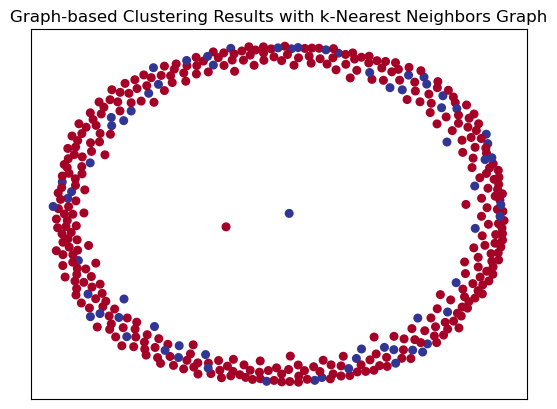

In [93]:
import pandas as pd
import scipy.sparse as sp
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
data=train_data

data = data[["Survived", "Sex"]]

# Handle missing values (if any)
data = data.dropna()

# Encode categorical features (Sex)
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Survived"] = le.fit_transform(data["Survived"])

# Create a k-Nearest Neighbors graph
knn_graph = kneighbors_graph(data, n_neighbors=5, mode='distance', include_self=False)

# Convert to CSR matrix
knn_graph_csr = csr_matrix(knn_graph)

# Create a minimal spanning tree using Prim's algorithm
mst = minimum_spanning_tree(knn_graph_csr)

# Convert the sparse matrix to a NetworkX graph
G = nx.Graph(mst) 

# Apply Spectral Clustering
clustering = SpectralClustering(n_clusters=2, affinity='precomputed')

adjacency_matrix = nx.adjacency_matrix(G)
adjacency_matrix_sparse = sp.csr_matrix(adjacency_matrix)
labels = clustering.fit_predict(adjacency_matrix_sparse)
# Add the cluster assignments to the original DataFrame
data['Cluster'] = labels

# Print the cluster assignments
print("Cluster assignments:", labels)

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

# Visualize the clusters
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=labels, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Graph-based Clustering Results with k-Nearest Neighbors Graph')
plt.show()


In [97]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(adjacency_matrix_sparse, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: -0.4645429101975738


In [100]:
from sklearn.metrics import confusion_matrix

# Fit the LabelEncoder on all unique labels in 'Survived' column
le.fit(data['Survived'])

# Transform 'Survived' column
ground_truth_labels = le.transform(data['Survived'])

# Create confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, labels)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[264   2]
 [152   0]]


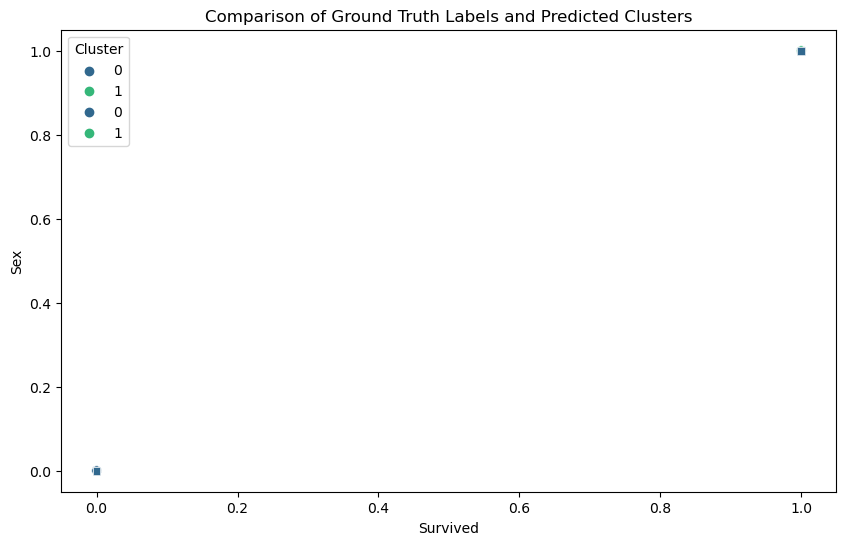

In [101]:
plt.figure(figsize=(10, 6))

# Visualize the ground truth labels
sns.scatterplot(x='Survived', y='Sex', hue='Survived', data=data, palette='viridis', s=50)

# Visualize the predicted clusters
sns.scatterplot(x='Survived', y='Sex', hue='Cluster', data=data, palette='viridis', s=30, marker='s')

plt.title('Comparison of Ground Truth Labels and Predicted Clusters')
plt.show()


Cluster assignments: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0]
Cluster Characteristics:
              Sex       Age       Fare  Embarked
Cluster                                         
0      

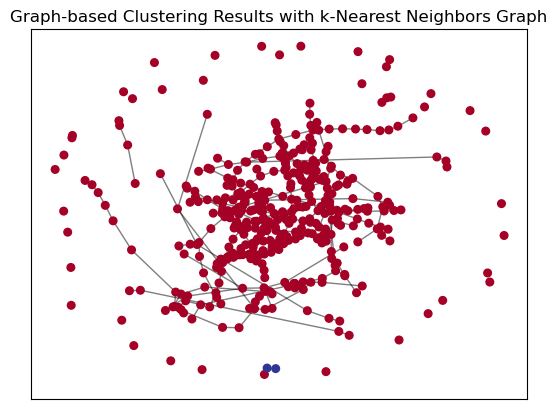

In [102]:
import pandas as pd
import scipy.sparse as sp
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import minimum_spanning_tree
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
data=train_data
# Assuming 'data' is your DataFrame
# Select the relevant columns
data = data[["Survived", "Sex","Age","Fare","Embarked"]]

# Encode categorical features (Sex)
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

# Create a k-Nearest Neighbors graph
knn_graph = kneighbors_graph(data, n_neighbors=5, mode='distance', include_self=False)

# Convert to CSR matrix
knn_graph_csr = csr_matrix(knn_graph)

# Create a minimal spanning tree using Prim's algorithm
mst = minimum_spanning_tree(knn_graph_csr)

# Convert the sparse matrix to a NetworkX graph
G = nx.Graph(mst) 

# Apply Spectral Clustering
clustering = SpectralClustering(n_clusters=2, affinity='precomputed')

adjacency_matrix = nx.adjacency_matrix(G)
adjacency_matrix_sparse = sp.csr_matrix(adjacency_matrix)
labels = clustering.fit_predict(adjacency_matrix_sparse)
# Add the cluster assignments to the original DataFrame
data['Cluster'] = labels

# Print the cluster assignments
print("Cluster assignments:", labels)

# Analyze cluster characteristics
cluster_summary = data.groupby('Cluster').mean()
print("Cluster Characteristics:")
print(cluster_summary)

# Visualize the clusters
pos = nx.spring_layout(G)  
nx.draw_networkx_nodes(G, pos, node_size=30, node_color=labels, cmap=plt.cm.RdYlBu)
nx.draw_networkx_edges(G, pos, alpha=0.5)
plt.title('Graph-based Clustering Results with k-Nearest Neighbors Graph')
plt.show()


KMeans Cluster assignments: [0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]
KMeans Cluster Characteristics:
                Survived  Sex
Cluster_KMeans               
0                    0.0  1.0
1

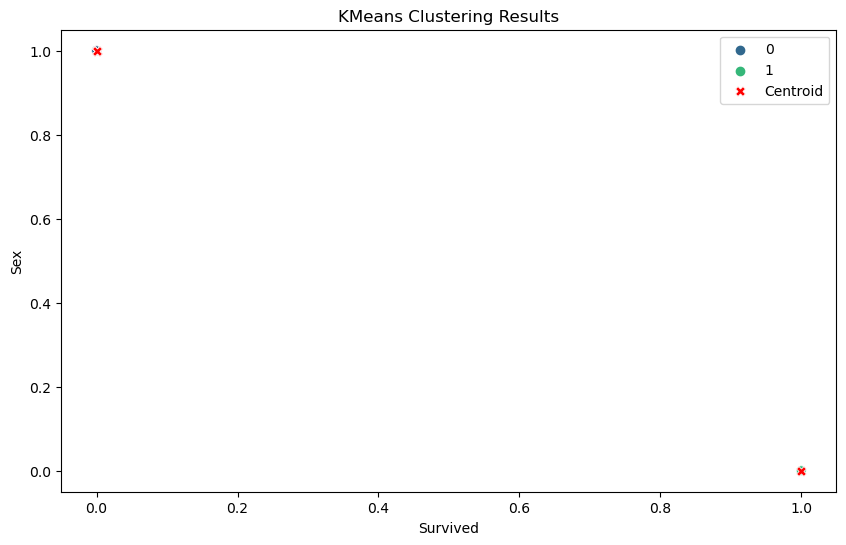

In [81]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
data=train_data
# Select the relevant columns
data = data[["Survived", "Sex"]]

# Encode categorical features (Sex)
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Survived"]=le.fit_transform(data["Survived"])

# Apply KMeans clustering (adjust n_clusters based on your analysis)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data)

# Print the cluster assignments
print("KMeans Cluster assignments:", data['Cluster_KMeans'].values)

# Analyze cluster characteristics
kmeans_cluster_summary = data.groupby('Cluster_KMeans').mean()
print("KMeans Cluster Characteristics:")
print(kmeans_cluster_summary)

# Visualize the KMeans clusters

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Survived', y='Sex', hue='Cluster_KMeans', data=data, palette='viridis', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1], s=50, color='red', marker='X', label='Centroid')

plt.title('KMeans Clustering Results')
plt.xlabel('Survived')
plt.ylabel('Sex')
plt.legend()
plt.show()

In [ ]:
data.head()

KMeans Cluster assignments: [0 2 2 0 0 0 0 2 0 3 0 2 1 2 4 3 0 0 0 2 4 0 2 1 4 2 1 0 2 2 2 3 2 2 1 0 0
 0 0 1 2 2 0 0 4 0 2 0 4 2 1 0 3 1 0 3 0 0 0 1 0 0 0 0 1 2 0 2 2 4 0 0 0 2
 1 1 0 2 0 0 3 4 2 0 0 0 0 0 0 3 0 0 1 0 3 0 4 0 0 0 4 2 0 0 0 2 0 0 0 0 2
 0 2 0 4 0 0 3 1 2 3 0 1 0 0 3 0 2 2 0 0 2 2 0 0 0 0 0 0 4 3 1 4 2 2 0 1 0
 2 2 1 0 2 0 3 0 1 0 2 0 0 3 0 0 2 0 4 3 2 0 0 0 0 0 2 3 3 4 2 4 0 1 1 0 1
 2 3 0 1 2 2 2 3 2 3 0 1 0 0 0 0 3 4 3 0 2 0 0 2 0 2 0 1 2 0 2 0 4 4 0 0 0
 0 0 2 0 0 0 2 0 1 3 0 0 1 0 4 0 0 4 2 2 4 0 2 4 3 2 2 0 3 0 1 0 0 0 0 0 0
 0 2 0 2 3 0 0 0 0 0 0 4 0 1 0 0 3 0 2 2 0 0 3 0 3 3 0 0 1 0 0 2 0 0 4 0 0
 3 2 1 0 0 0 2 0 0 2 1 3 4 2 0 0 0 0 4 0 4 0 0 3 0 0 0 2 1 0 3 4 2 0 2 2 0
 0 0 2 0 0 3 0 0 0 1 4 0 0 0 0 0 2 4 0 1 4 3 2 4 0 0 0 1 3 2 0 1 1 0 3 4 0
 0 1 0 2 4 4 0 0 4 3 0 0 0 0 0 1 0 2 0 3 1 2 3 2 2 1 0 4 0 0 1 2 1 1 2 0 0
 4 0 3 0 1 0 0 1 0 0 2]
KMeans Cluster Characteristics:
                     Sex        Age       Fare  Embarked
Cluster_KMeans                    

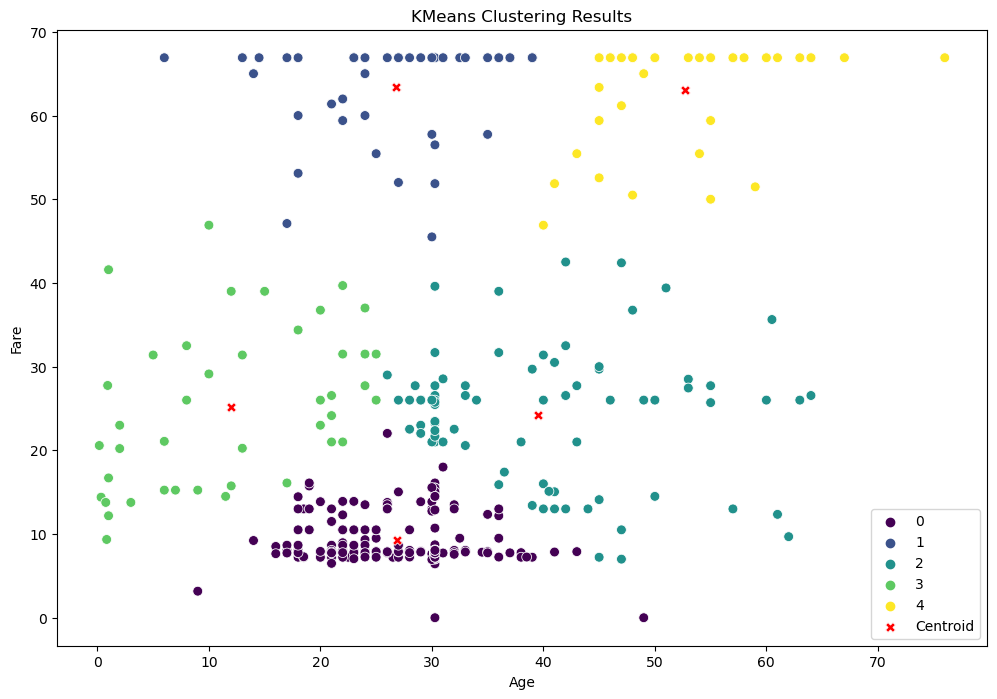

In [85]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
data=train_data
data = data[["Survived", "Sex", "Age", "Fare", "Embarked"]]

# Handle missing values (if any)
data = data.dropna()

# Encode categorical features (Sex and Embarked)
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

# Apply KMeans clustering (adjust n_clusters based on your analysis)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster_KMeans'] = kmeans.fit_predict(data)

# Print the cluster assignments
print("KMeans Cluster assignments:", data['Cluster_KMeans'].values)

# Analyze cluster characteristics
kmeans_cluster_summary = data.groupby('Cluster_KMeans').mean()
print("KMeans Cluster Characteristics:")
print(kmeans_cluster_summary)

# Visualize the KMeans clusters
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Age', y='Fare', hue='Cluster_KMeans', data=data, palette='viridis', s=50)
sns.scatterplot(x=kmeans.cluster_centers_[:, 2], y=kmeans.cluster_centers_[:, 3], s=50, color='red', marker='X', label='Centroid')

plt.title('KMeans Clustering Results')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()


In [107]:
from sklearn.metrics import silhouette_score


print(data.columns)  # Check available columns

if 'Cluster' in data.columns:
    silhouette_avg = silhouette_score(data[['Survived', 'Sex']], data['Cluster'])
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("Column 'Cluster_KMeans' not found in the DataFrame.")


Index(['Survived', 'Sex', 'Age', 'Fare', 'Embarked', 'Cluster'], dtype='object')
Silhouette Score: -0.49448319594166246


In [109]:
from sklearn.metrics import confusion_matrix
le.fit(data['Survived'])

ground_truth_labels = le.transform(data['Survived'])

# Create confusion matrix
conf_matrix = confusion_matrix(ground_truth_labels, data['Cluster'])
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[264   2]
 [152   0]]


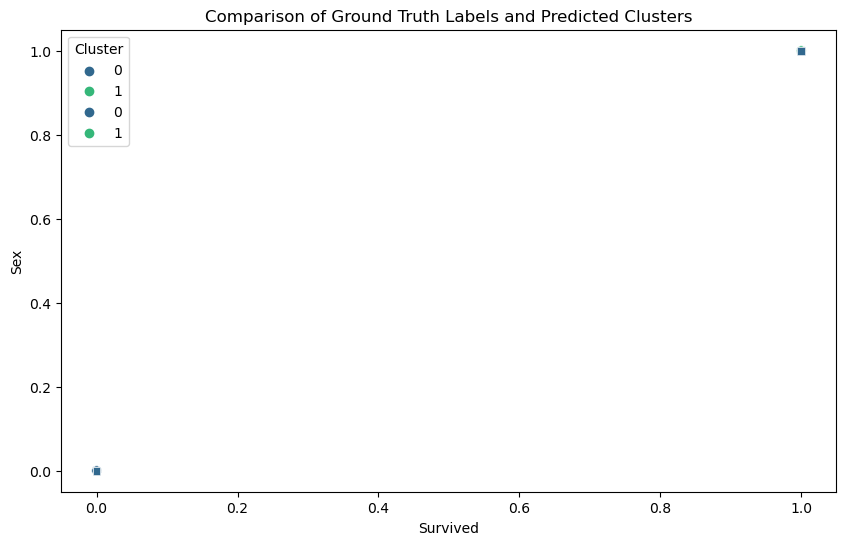

In [110]:
plt.figure(figsize=(10, 6))

# Visualize the ground truth labels
sns.scatterplot(x='Survived', y='Sex', hue='Survived', data=data, palette='viridis', s=50)

# Visualize the predicted clusters
sns.scatterplot(x='Survived', y='Sex', hue='Cluster', data=data, palette='viridis', s=30, marker='s')

plt.title('Comparison of Ground Truth Labels and Predicted Clusters')
plt.show()
